In [152]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from datetime import timedelta

# adfuller checks if data is stationary or non-stationary (Augmented Dickey-Fuller (ADF) test)
from statsmodels.tsa.stattools import adfuller

# ARIMA function for model building
from statsmodels.tsa.arima.model import ARIMA

#from pmdarima import auto_arima
# from auto_arima we will get order of p,d,q


# import numpy as np # Remove this import here as pmdarima will handle it
from statsmodels.tsa.stattools import adfuller
# adfuller checks if data is stationary or non-stationary (Augmented Dickey-Fuller (ADF) test)

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [153]:
#Importing Data set into collab
df=pd.read_csv("/content/AAPL (4).csv")
df1=df.copy()

In [154]:
#Data set preview
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [155]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [156]:
#  Data set rows and column
df.shape

print(f"Data set contain total: {df.shape[0]} rows and {df.shape[1]} columns")

Data set contain total: 2011 rows and 7 columns


In [157]:
# Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [158]:
# Data set decription /Numerical stat
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [159]:
# Duplicated values
df.duplicated().sum()

np.int64(0)

In [160]:
# Null values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<Axes: >

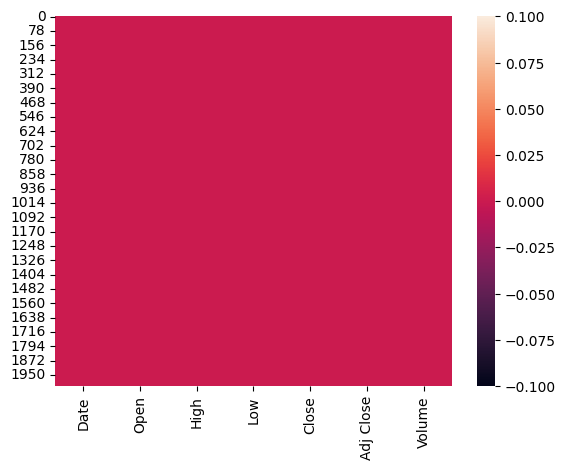

In [161]:
# Visulaising Null values
sns.heatmap(df.isnull())

In [162]:
# Data set columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#EDA

In [163]:
#Converting Date column into datetime datatype
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.sort_values('Date', inplace=True)


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [165]:
df['Month'] = df['Date'].dt.strftime('%B')

In [166]:
#Set Date column as index
df.set_index('Date', inplace=True)

In [167]:
# 10-day moving average
df['MA_10'] = df['Close'].rolling(window=10).mean()
# 50-day moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()
# 10-day volatility
df['Volatility_10'] = df['Close'].rolling(window=10).std()
# Daily returns
df['Returns'] = df['Close'].pct_change()  # Daily returns

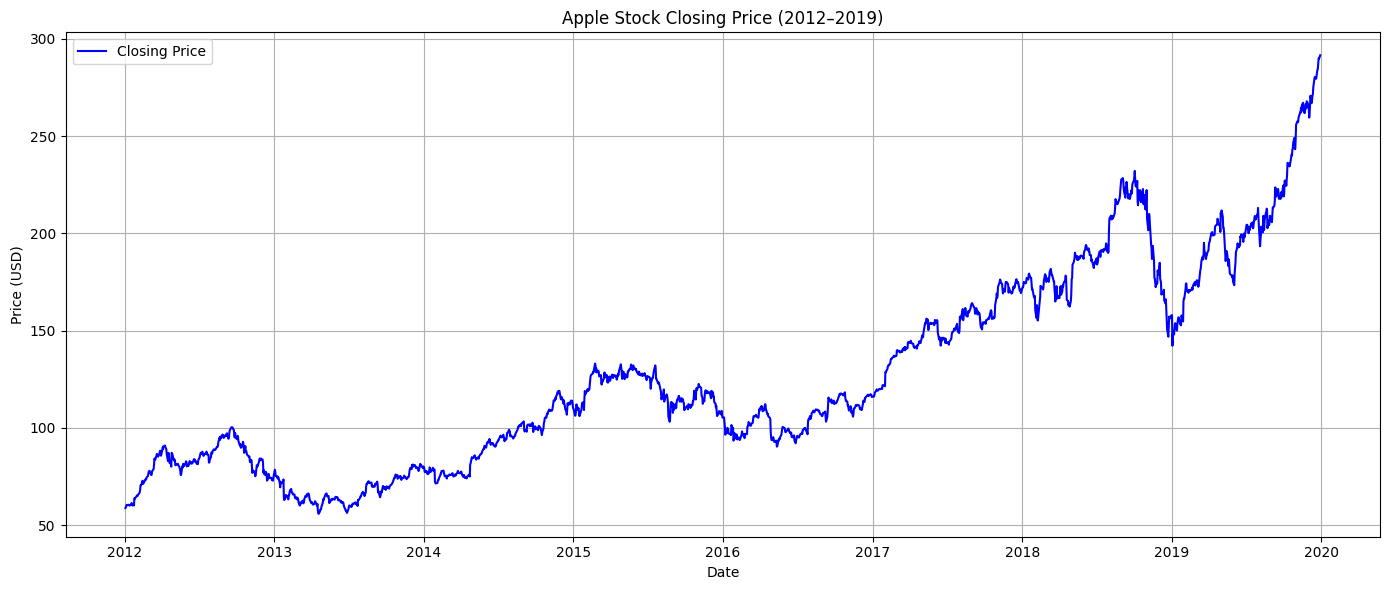

In [168]:
# Plot the closing price over time
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Apple Stock Closing Price (2012–2019)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


* Apple's stock price grew a lot between 2012 and 2019, despite some periods of declines and volatility. The end of 2019 saw an especially big increase. This shows long-term growth with short-term risks.

In [169]:
#Monthly Average Closing Price
monthly_avg = df.groupby('Month')['Close'].mean()

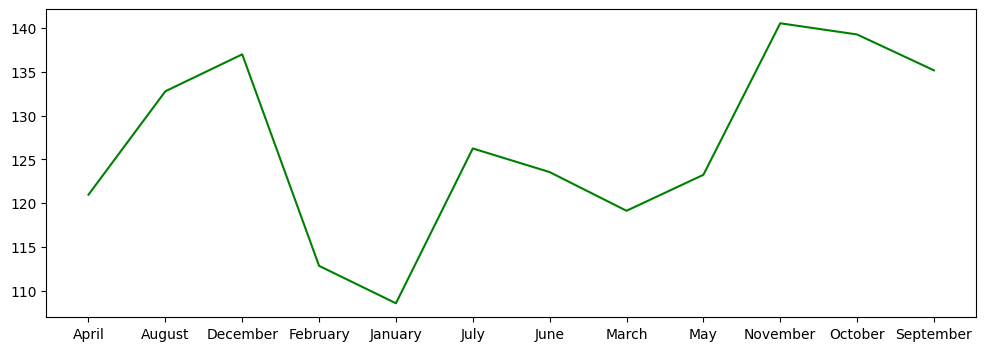

In [170]:
#line chart Monthly Average Closing Price
plt.figure(figsize=(12, 4))
plt.plot(monthly_avg.index, monthly_avg.values, label='Monthly Average Closing Price', color='green')

* The value is highest in the months of November, October, December, and August.
* The value is lowest in January and February.
* There is a clear dip at the beginning of the year and a peak in the late fall and early winter months.

<Figure size 1400x1000 with 0 Axes>

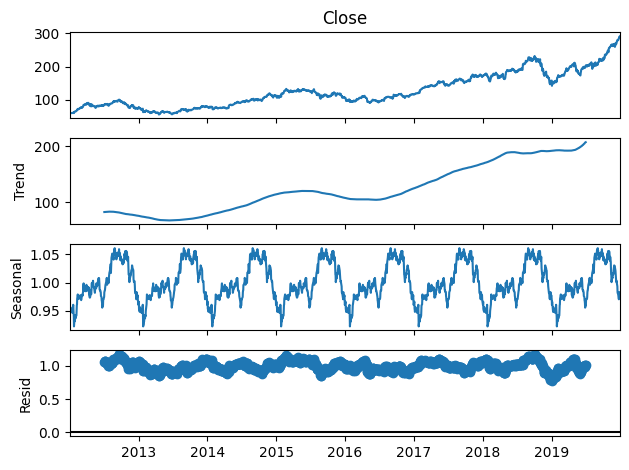

In [171]:
# Plot 3: Time series decomposition (Trend, Seasonality, Residual)
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
plt.figure(figsize=(14, 10))
result.plot()
plt.tight_layout()
plt.show()

* This is the real closing price of the stock over time.
* You can see the price generally goes up in the long run.

--

* This smooth line shows the overall direction or "trend" of the stock.
* The trend increases steadily, meaning the value of the stock is growing over time.


--


* The seasonal effect is quite visible and repeats almost every year, suggesting there are months or periods when the stock regularly goes up or down.

--

* The residuals stay close to 1, which means there are no huge unusual swings outside of the regular trend and seasonal pattern.

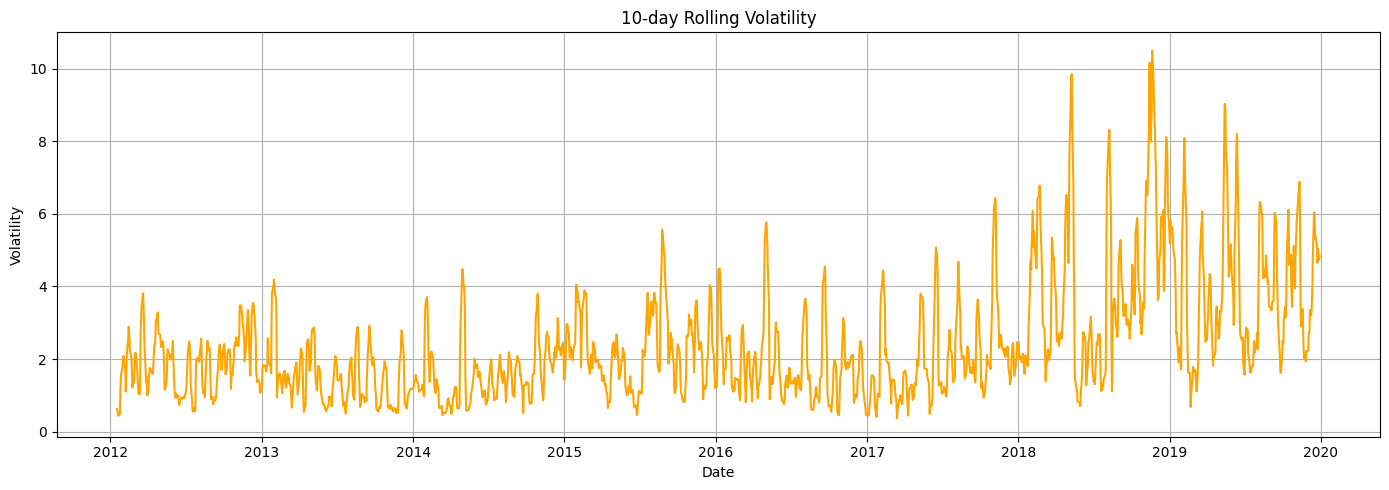

In [172]:
#10-day Volatility
plt.figure(figsize=(14, 5))
plt.plot(df['Volatility_10'], label='10-day Volatility', color='orange')
plt.title('10-day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

* Over time, volatility (10-day rolling mean) changes a lot.
* spikes happen at the same time as market events or news reports.

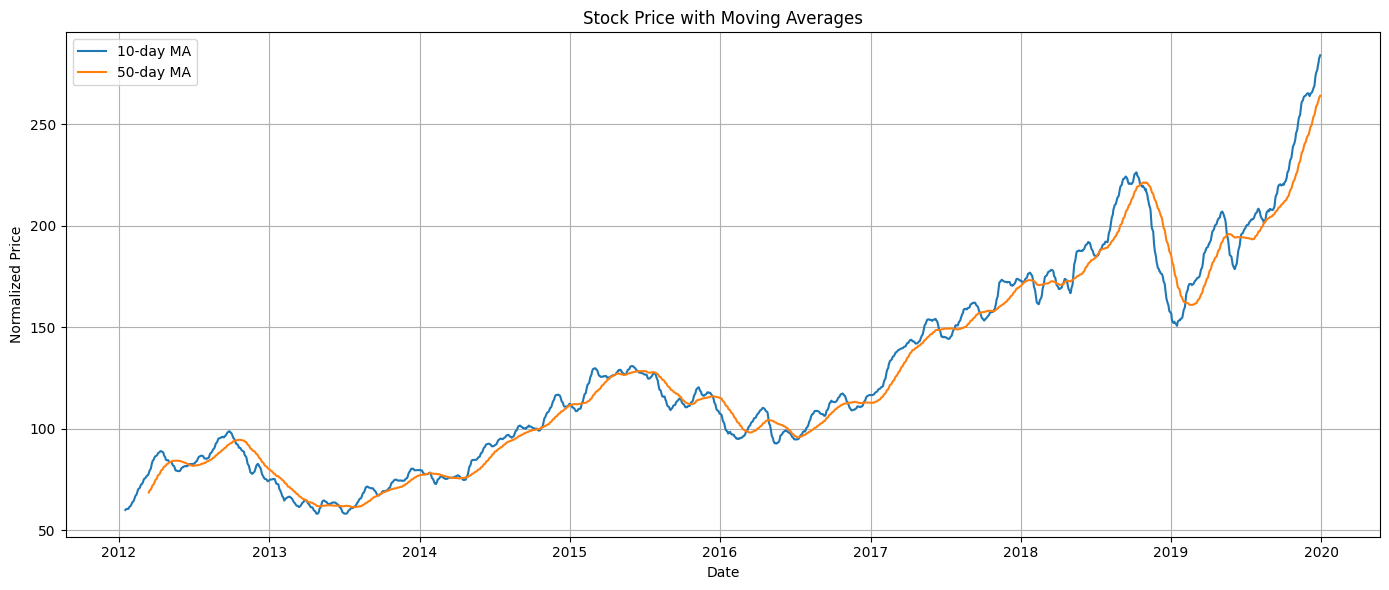

In [173]:
# 10-day and 50-day Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df['MA_10'], label='10-day MA')
plt.plot(df['MA_50'], label='50-day MA')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* The blue line (10-day MA) reacts quickly to changes and shows short-term  movements.
* The orange line (50-day MA) is smoother and shows the long-term trend.

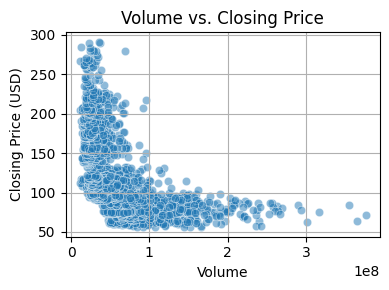

In [174]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


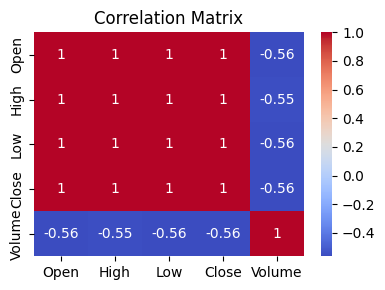

In [175]:
#Correlation Plot
plt.figure(figsize=(4, 3))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()

plt.show()

* Strong positive correlations among Open, High, Low, and Close.

* price change magnitude is not directly tied to trade volume.

In [176]:
#Feature Selection
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = ['Close']


In [177]:
# Handling missing values
df.fillna(method='ffill', inplace=True)

In [178]:
adfuller(df['Close'])[1] # returns p value at index 1

np.float64(0.9961170178032009)

In [179]:
if adfuller(df['Close'])[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

Data is not stationary


In [180]:
# Standardize the features
#scaler = StandardScaler()
#df[features] = scaler.fit_transform(df[features])

In [181]:

# Split data
train_size = int(len(df) * 0.85)
train, test = df['Close'][:train_size], df['Close'][train_size:]


ARIMA

In [182]:

# ARIMA manual hyperparameter tuning
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_score, best_cfg = float("inf"), None
for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        pred = model_fit.forecast(steps=len(test))
        rmse = sqrt(mean_squared_error(test, pred))
        if rmse < best_score:
            best_score, best_cfg = rmse, param
        print(f'ARIMA{param} RMSE={rmse:.4f}')
    except:
        continue

print(f'Best ARIMA{best_cfg} RMSE={best_score:.4f}')


ARIMA(0, 0, 0) RMSE=97.2659
ARIMA(0, 0, 1) RMSE=97.1108
ARIMA(0, 0, 2) RMSE=96.9063
ARIMA(0, 1, 0) RMSE=37.8536
ARIMA(0, 1, 1) RMSE=37.9293
ARIMA(0, 1, 2) RMSE=37.9298
ARIMA(0, 2, 0) RMSE=840.3412
ARIMA(0, 2, 1) RMSE=46.8347
ARIMA(0, 2, 2) RMSE=46.2143
ARIMA(1, 0, 0) RMSE=37.8546
ARIMA(1, 0, 1) RMSE=37.9392
ARIMA(1, 0, 2) RMSE=37.9204
ARIMA(1, 1, 0) RMSE=37.9251
ARIMA(1, 1, 1) RMSE=37.9328
ARIMA(1, 1, 2) RMSE=37.9352
ARIMA(1, 2, 0) RMSE=306.4703
ARIMA(1, 2, 1) RMSE=46.3563
ARIMA(1, 2, 2) RMSE=46.6106
ARIMA(2, 0, 0) RMSE=37.9353
ARIMA(2, 0, 1) RMSE=37.8497
ARIMA(2, 0, 2) RMSE=37.9017
ARIMA(2, 1, 0) RMSE=37.9249
ARIMA(2, 1, 1) RMSE=37.9359
ARIMA(2, 1, 2) RMSE=38.1342
ARIMA(2, 2, 0) RMSE=397.3189
ARIMA(2, 2, 1) RMSE=47.1277
ARIMA(2, 2, 2) RMSE=46.4622
Best ARIMA(2, 0, 1) RMSE=37.8497


In [183]:
# Fit best ARIMA model
model = ARIMA(df['Close'], order=best_cfg)
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

In [184]:
t1 = df['Close']

In [185]:
import matplotlib.dates as mdates


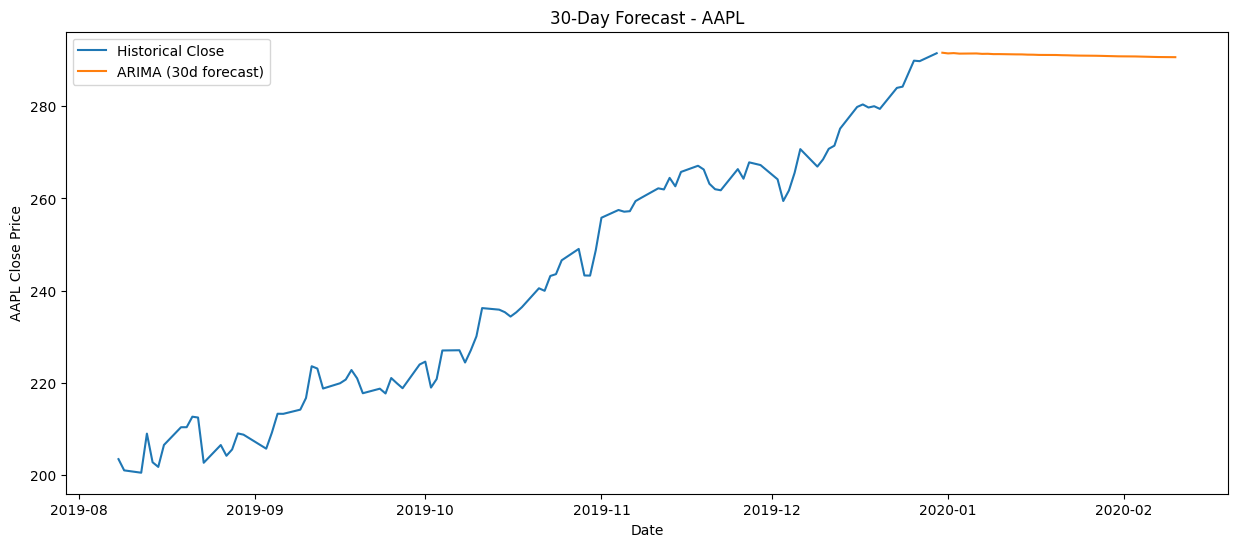

In [186]:
forecast_dates = pd.date_range(start=t1.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
plt.figure(figsize=(15,6))
plt.plot(t1[-100:], label='Historical Close')
plt.plot(forecast_dates, forecast, label='ARIMA (30d forecast)')
plt.xlabel('Date')
plt.ylabel('AAPL Close Price')
plt.title('30-Day Forecast - AAPL')
plt.legend()
plt.show()

SARIMA

In [187]:

# SARIMA hyperparameter tuning
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 7  # Weekly seasonality
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q))

best_score, best_cfg = float("inf"), None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train,
                            order=param,
                            seasonal_order=(seasonal_param[0], seasonal_param[1], seasonal_param[2], s),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            pred = results.forecast(steps=len(test))
            rmse = sqrt(mean_squared_error(test, pred))
            if rmse < best_score:
                best_score, best_cfg = rmse, (param, seasonal_param)
            print(f'SARIMA{param}x{seasonal_param} RMSE={rmse:.4f}')
        except:
            continue

print(f'Best SARIMA{best_cfg} RMSE={best_score:.4f}')


SARIMA(0, 0, 0)x(0, 0, 0) RMSE=207.0828
SARIMA(0, 0, 0)x(0, 0, 1) RMSE=205.1435
SARIMA(0, 0, 0)x(0, 1, 0) RMSE=37.2689
SARIMA(0, 0, 0)x(0, 1, 1) RMSE=37.3159
SARIMA(0, 0, 0)x(1, 0, 0) RMSE=51.4937
SARIMA(0, 0, 0)x(1, 0, 1) RMSE=52.3225
SARIMA(0, 0, 0)x(1, 1, 0) RMSE=37.3176
SARIMA(0, 0, 0)x(1, 1, 1) RMSE=37.3175
SARIMA(0, 0, 1)x(0, 0, 0) RMSE=206.7858
SARIMA(0, 0, 1)x(0, 0, 1) RMSE=204.8898
SARIMA(0, 0, 1)x(0, 1, 0) RMSE=37.3862
SARIMA(0, 0, 1)x(0, 1, 1) RMSE=37.7108
SARIMA(0, 0, 1)x(1, 0, 0) RMSE=50.5928
SARIMA(0, 0, 1)x(1, 0, 1) RMSE=53.7803
SARIMA(0, 0, 1)x(1, 1, 0) RMSE=37.7542
SARIMA(0, 0, 1)x(1, 1, 1) RMSE=37.7570
SARIMA(0, 1, 0)x(0, 0, 0) RMSE=37.8536
SARIMA(0, 1, 0)x(0, 0, 1) RMSE=37.8072
SARIMA(0, 1, 0)x(0, 1, 0) RMSE=64.9526
SARIMA(0, 1, 0)x(0, 1, 1) RMSE=42.3455
SARIMA(0, 1, 0)x(1, 0, 0) RMSE=37.8052
SARIMA(0, 1, 0)x(1, 0, 1) RMSE=37.8263
SARIMA(0, 1, 0)x(1, 1, 0) RMSE=38.0685
SARIMA(0, 1, 0)x(1, 1, 1) RMSE=42.2135
SARIMA(0, 1, 1)x(0, 0, 0) RMSE=37.9293
SARIMA(0, 1, 1)x(0, 0

In [188]:

# Fit best SARIMA model
param, seasonal_param = best_cfg
model = SARIMAX(df['Close'],
                order=param,
                seasonal_order=(seasonal_param[0], seasonal_param[1], seasonal_param[2], 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()



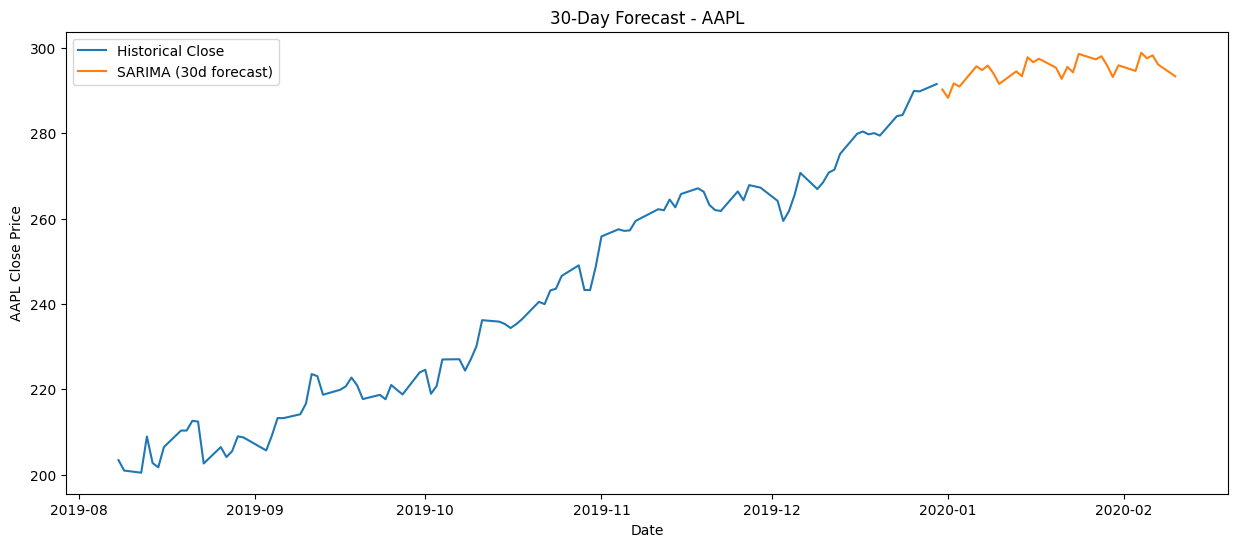

In [189]:
forecast_dates = pd.date_range(start=t1.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
plt.figure(figsize=(15,6))
plt.plot(t1[-100:], label='Historical Close')
plt.plot(forecast_dates, results.forecast(steps=30), label='SARIMA (30d forecast)')
plt.xlabel('Date')
plt.ylabel('AAPL Close Price')
plt.title('30-Day Forecast - AAPL')
plt.legend()
plt.show()

XG Boost

In [192]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [193]:
# Load and prepare data
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df1 = df1.sort_values('Date')

# Create lag features
for lag in range(1, 6):
    df1[f'lag_{lag}'] = df1['Close'].shift(lag)

df_model = df1.dropna().copy()

# Features and target
features = [f'lag_{i}' for i in range(1, 6)]
target = 'Close'
X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)








XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [194]:
# Evaluate model
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Performance:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR2 Score: {r2:.2f}")

XGBoost Performance:
RMSE: 33.06
MAE: 22.34
R2 Score: -0.21


In [195]:
# 30-day forecast
last_known = df_model['Close'].values[-5:].tolist()
future_predictions = []
start_date = df_model['Date'].max()

for i in range(30):
    input_features = np.array(last_known[-5:]).reshape(1, -1)
    next_pred = xgb_model.predict(input_features)[0]
    future_predictions.append({
        'Date': start_date + timedelta(days=i+1),
        'Predicted_Close': next_pred
    })
    last_known.append(next_pred)

future_df = pd.DataFrame(future_predictions)

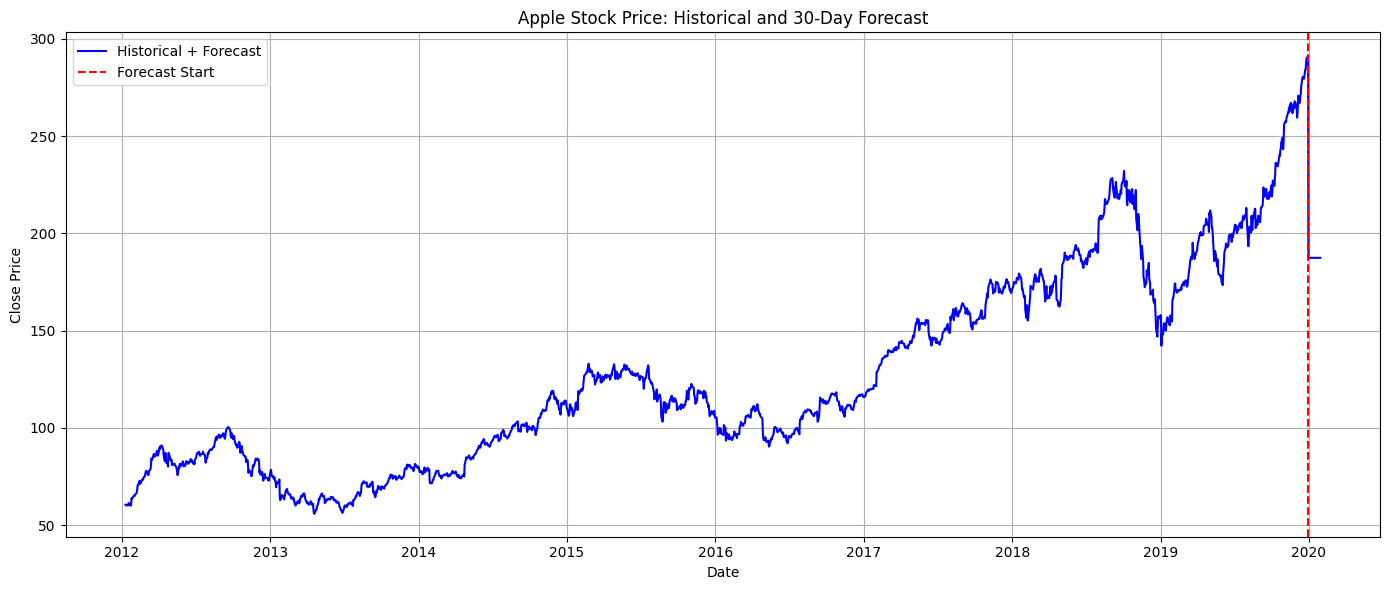

In [196]:
# Plotting
plot_df = df_model[['Date', 'Close']].copy()
future_df_renamed = future_df.rename(columns={'Predicted_Close': 'Close'})
plot_df = pd.concat([plot_df, future_df_renamed], ignore_index=True)

plt.figure(figsize=(14, 6))
plt.plot(plot_df['Date'], plot_df['Close'], label='Historical + Forecast', color='blue')
plt.axvline(df_model['Date'].max(), color='red', linestyle='--', label='Forecast Start')
plt.title('Apple Stock Price: Historical and 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [199]:
import pickle


In [200]:
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(results, f)

print("SARIMS model saved successfully!")


SARIMS model saved successfully!
